In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set_theme()

In [118]:
# Load the concrete dataset
concrete = datasets.fetch_openml(name='Concrete_Compressive_Strength',version=7, as_frame=True)
df = concrete.frame

X = df.drop(columns='strength').values
y = df['strength'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg3.fit(X_train, y3)

In [109]:
mse_one_regressor = mean_squared_error(y_test, tree_reg1.predict(X_test))
mse_boosted = mean_squared_error(y_test, tree_reg1.predict(X_test)+ tree_reg2.predict(X_test)+ tree_reg3.predict(X_test))
print("MSE of a single depth 3 regression tree: " + str(mse_one_regressor))
print("MSE after two steps of gradient boosting: " + str(mse_boosted))

MSE of a single depth 3 regression tree: 132.22844213522853
MSE after two steps of gradient boosting: 79.8049131795041


In [110]:
gb_reg = GradientBoostingRegressor(max_depth = 3, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

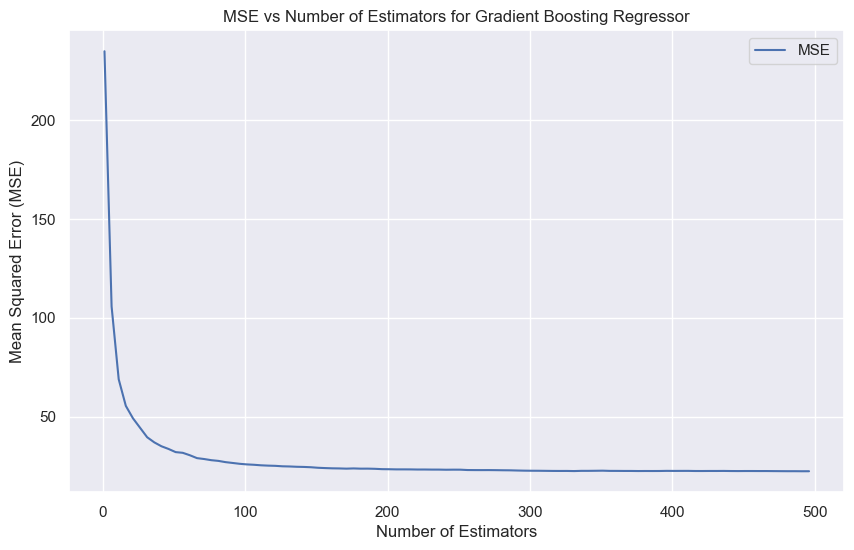

In [114]:
mses = []
for i in range(1, 501, 5):
    gb_reg = GradientBoostingRegressor(max_depth = 3, n_estimators = i, learning_rate=0.2, random_state=42)
    gb_reg.fit(X_train, y_train)
    y_pred = gb_reg.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))
x = range(1, 501, 5)
plt.figure(figsize=(10, 6))
plt.plot(x, mses, label='MSE')
plt.title('MSE vs Number of Estimators for Gradient Boosting Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(min(mses))

In [116]:
print("Target Mean: " + str(np.mean(y_test)))
print("Target Variance: " + str(np.std(y_test)**2))

Target Mean: 35.53367952900692
Target Variance: 296.1888238047551


With gradient boosting, we can achieve a mean squared error of about 22.5. This is a  normalized MSE of 22.45/296.16 = 0.076. This is a very low error, suggesting that this ensemble strategy is very effective. This same dataset was used in the Regression Tree implementation, which could do no better than an MSE of 50. Using gradient boosting, subsequent estimators each are able to decrease mse by more, because each estimator compensates for the errors accumulated by all of the past estimators. Gradient Boosting is a very effective way to reduce variance and make our regression be as accurate as possible.